In [1]:
import matplotlib.pyplot as plt
import os

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [3]:
root_work_dir = './Work_dirs/work_dirs_external/'

root_work_dir = './Work_dirs/work_dirs_external/'


img_type = 'infrared'

time_stamps = [
    #'20200312_2121',
               '20200330_0956',
               '20200329_2055',
               '20200330_0959'               
              ]
lrs = [
    #'18',
       '5e-5',
       '50 20200329_1227',
       '5e-4']
        
        
fig, ax = plt.subplots(figsize=(15,10))

i = 0

for time_stamp in time_stamps:
    
    
    if type(time_stamp) == type([]):
        train_loss = []
        VAL_loss = []
        for ts in time_stamp:
            work_dir = root_work_dir+ img_type +'/' + ts
            with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
                train_loss = [*train_loss, *list(map(float,  f.readlines()[0].split() )) ]

            with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
                VAL_loss = [*VAL_loss, *list(map(float,  f.readlines()[0].split() ))]
    else:
        work_dir = root_work_dir+ img_type +'/' + time_stamp
        with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
            train_loss = list(map(float,  f.readlines()[0].split() )) 

        with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
            VAL_loss = list(map(float,  f.readlines()[0].split() )) 

    
    #ax.plot( train_loss, label= lrs[i] )
    ax.plot( VAL_loss, label='VALIDATION ' + lrs[i] + ' ' + str(time_stamp))
    
    i = i+1
    


    
plt.yticks( fontsize=12)
plt.xticks( fontsize=12)
ax.legend(fontsize=16)
plt.ylabel('Loss', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.yaxis.grid()
plt.ylim((0.1,0.3))
ax.grid()

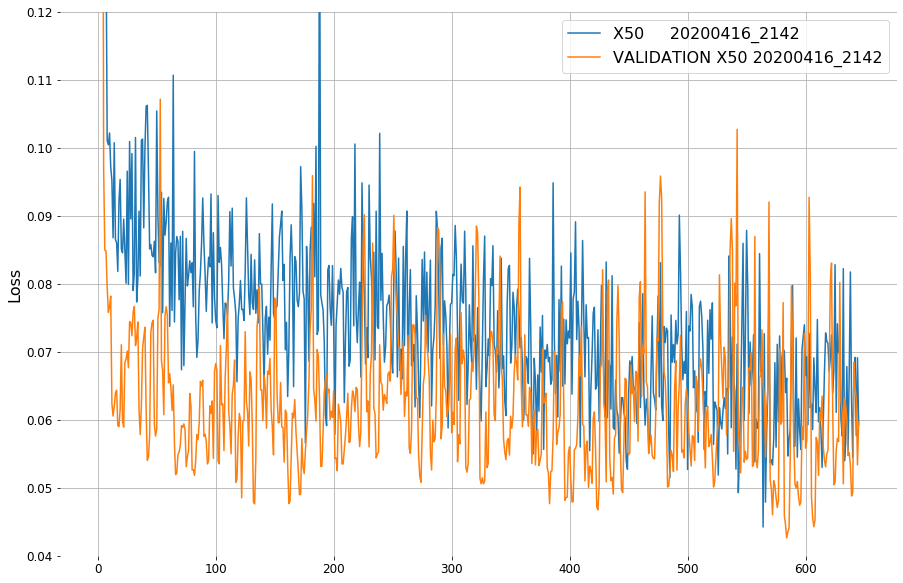

In [7]:
root_work_dir = './Work_dirs/work_dirs_external/'

img_type = 'ensemble'
#'20200306_1628'
#'4'
time_stamps = ['20200313_0915','20200313_0928','20200314_2125','20200313_1909', '20200314_2044']#,'20200222_0826'] #]#
lrs = ['1e-5','4e-5', '7e-5','1e-4', '5e-4']#, 'baseline1280']

#512, 64
time_stamps = ['20200313_1909','20200313_0928','20200317_1321','20200317_1019']#,'20200315_2150','20200315_1924','20200314_2313']
lrs = ['1024 128','1024 128','1024 64','768 96']#,'640 160','512 128','512 64']
 
#'20200323_1109','20200330_2119', '20200402_0917','20200403_1435',
#'2','2', '2','50',
time_stamps= [ '20200416_2142' ]#'20200321_1812','20200322_2317','20200323_1109','20200323_1746',
lrs = ['X50']#'2 1e-4','4','2','4  1e-5',

fig, ax = plt.subplots(figsize=(15,10))

i = 0

for time_stamp in time_stamps:
    work_dir = root_work_dir+ img_type +'/' + time_stamp
    
    with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
        train_loss = list(map(float,  f.readlines()[0].split() )) 
        
    with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
        VAL_loss = list(map(float,  f.readlines()[0].split() )) 

    #if len(train_loss) > 400:
    #    ax.plot( train_loss[:400], label= lrs[i] + '     ' + time_stamp)
    #else:
    ax.plot( train_loss, label= lrs[i] + '     ' + time_stamp)
    ax.plot( VAL_loss, label='VALIDATION ' + lrs[i] + ' ' + time_stamp)
    
    i = i+1
    


    
plt.yticks( fontsize=12)
plt.xticks( fontsize=12)
ax.legend(fontsize=16)
plt.ylabel('Loss', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.yaxis.grid()
plt.ylim((0.04,0.12))
ax.grid()

#### root_work_dir = './Work_dirs/work_dirs_external/'

img_type = 'rgb'
# '20200225_1448','20200326_1349',
#'18','1e-3',
time_stamps = ['20200329_1239']
lrs = ['50 lr5e-5 20200325_1236',]
     
        
fig, ax = plt.subplots(figsize=(15,10))

i = 0

for time_stamp in time_stamps:
    work_dir = root_work_dir+ img_type +'/' + time_stamp
    
    with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
        train_loss = list(map(float,  f.readlines()[0].split() )) 
        
    with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
        VAL_loss = list(map(float,  f.readlines()[0].split() )) 


    ax.plot( train_loss, label= lrs[i] + '     ' + time_stamp)
    ax.plot( VAL_loss, label='VALIDATION ' + lrs[i] + ' ' + time_stamp)
    
    i = i+1
    


    
plt.yticks( fontsize=12)
plt.xticks( fontsize=12)
ax.legend(fontsize=16)
plt.ylabel('Loss', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.yaxis.grid()
#plt.ylim((0.05,0.3))
ax.grid()